In [1]:
# Imports
import os
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
FOLDS = 5
N_JOBS = 6
SEED = 2016

#DATA = "Base"
#DATA = "Time"
#DATA = "Medians"
DATA = "Lags"


In [2]:
# Get data
train_y1b1 = pd.read_csv("clean_data/train_y1b1_" + DATA + ".csv")
train_y1b2 = pd.read_csv("clean_data/train_y1b2_" + DATA + ".csv")
train_y1b3 = pd.read_csv("clean_data/train_y1b3_" + DATA + ".csv")
train_y1b4 = pd.read_csv("clean_data/train_y1b4_" + DATA + ".csv")

train_y2b1 = pd.read_csv("clean_data/train_y2b1_" + DATA + ".csv")
train_y2b2 = pd.read_csv("clean_data/train_y2b2_" + DATA + ".csv")
train_y2b4 = pd.read_csv("clean_data/train_y2b4_" + DATA + ".csv")

train_y3b3 = pd.read_csv("clean_data/train_y3b3_" + DATA + ".csv")

train_y4b1 = pd.read_csv("clean_data/train_y4b1_" + DATA + ".csv")
train_y4b2 = pd.read_csv("clean_data/train_y4b2_" + DATA + ".csv")
train_y4b4 = pd.read_csv("clean_data/train_y4b4_" + DATA + ".csv")

train_y5b1 = pd.read_csv("clean_data/train_y5b1_" + DATA + ".csv")
train_y5b2 = pd.read_csv("clean_data/train_y5b2_" + DATA + ".csv")
train_y5b3 = pd.read_csv("clean_data/train_y5b3_" + DATA + ".csv")
train_y5b4 = pd.read_csv("clean_data/train_y5b4_" + DATA + ".csv")
###
X_train_y1b1 = pd.read_csv("clean_data/X_train_y1b1_" + DATA + ".csv")
X_train_y1b2 = pd.read_csv("clean_data/X_train_y1b2_" + DATA + ".csv")
X_train_y1b3 = pd.read_csv("clean_data/X_train_y1b3_" + DATA + ".csv")
X_train_y1b4 = pd.read_csv("clean_data/X_train_y1b4_" + DATA + ".csv")

X_train_y2b1 = pd.read_csv("clean_data/X_train_y2b1_" + DATA + ".csv")
X_train_y2b2 = pd.read_csv("clean_data/X_train_y2b2_" + DATA + ".csv")
X_train_y2b4 = pd.read_csv("clean_data/X_train_y2b4_" + DATA + ".csv")

X_train_y3b3 = pd.read_csv("clean_data/X_train_y3b3_" + DATA + ".csv")

X_train_y4b1 = pd.read_csv("clean_data/X_train_y4b1_" + DATA + ".csv")
X_train_y4b2 = pd.read_csv("clean_data/X_train_y4b2_" + DATA + ".csv")
X_train_y4b4 = pd.read_csv("clean_data/X_train_y4b4_" + DATA + ".csv")

X_train_y5b1 = pd.read_csv("clean_data/X_train_y5b1_" + DATA + ".csv")
X_train_y5b2 = pd.read_csv("clean_data/X_train_y5b2_" + DATA + ".csv")
X_train_y5b3 = pd.read_csv("clean_data/X_train_y5b3_" + DATA + ".csv")
X_train_y5b4 = pd.read_csv("clean_data/X_train_y5b4_" + DATA + ".csv")
###
X_trainVal_y1b1 = pd.read_csv("clean_data/X_trainVal_y1b1_" + DATA + ".csv")
X_trainVal_y1b2 = pd.read_csv("clean_data/X_trainVal_y1b2_" + DATA + ".csv")
X_trainVal_y1b3 = pd.read_csv("clean_data/X_trainVal_y1b3_" + DATA + ".csv")
X_trainVal_y1b4 = pd.read_csv("clean_data/X_trainVal_y1b4_" + DATA + ".csv")

X_trainVal_y2b1 = pd.read_csv("clean_data/X_trainVal_y2b1_" + DATA + ".csv")
X_trainVal_y2b2 = pd.read_csv("clean_data/X_trainVal_y2b2_" + DATA + ".csv")
X_trainVal_y2b4 = pd.read_csv("clean_data/X_trainVal_y2b4_" + DATA + ".csv")

X_trainVal_y3b3 = pd.read_csv("clean_data/X_trainVal_y3b3_" + DATA + ".csv")

X_trainVal_y4b1 = pd.read_csv("clean_data/X_trainVal_y4b1_" + DATA + ".csv")
X_trainVal_y4b2 = pd.read_csv("clean_data/X_trainVal_y4b2_" + DATA + ".csv")
X_trainVal_y4b4 = pd.read_csv("clean_data/X_trainVal_y4b4_" + DATA + ".csv")

X_trainVal_y5b1 = pd.read_csv("clean_data/X_trainVal_y5b1_" + DATA + ".csv")
X_trainVal_y5b2 = pd.read_csv("clean_data/X_trainVal_y5b2_" + DATA + ".csv")
X_trainVal_y5b3 = pd.read_csv("clean_data/X_trainVal_y5b3_" + DATA + ".csv")
X_trainVal_y5b4 = pd.read_csv("clean_data/X_trainVal_y5b4_" + DATA + ".csv")
###
'''test = pd.read_csv("clean_data/test_" + DATA + ".csv")'''
test_y1b1 = pd.read_csv("clean_data/test_y1b1_" + DATA + ".csv")
test_y1b2 = pd.read_csv("clean_data/test_y1b2_" + DATA + ".csv")
test_y1b3 = pd.read_csv("clean_data/test_y1b3_" + DATA + ".csv")
test_y1b4 = pd.read_csv("clean_data/test_y1b4_" + DATA + ".csv")

test_y2b1 = pd.read_csv("clean_data/test_y2b1_" + DATA + ".csv")
test_y2b2 = pd.read_csv("clean_data/test_y2b2_" + DATA + ".csv")
test_y2b4 = pd.read_csv("clean_data/test_y2b4_" + DATA + ".csv")

test_y3b3 = pd.read_csv("clean_data/test_y3b3_" + DATA + ".csv")

test_y4b1 = pd.read_csv("clean_data/test_y4b1_" + DATA + ".csv")
test_y4b2 = pd.read_csv("clean_data/test_y4b2_" + DATA + ".csv")
test_y4b4 = pd.read_csv("clean_data/test_y4b4_" + DATA + ".csv")

test_y5b1 = pd.read_csv("clean_data/test_y5b1_" + DATA + ".csv")
test_y5b2 = pd.read_csv("clean_data/test_y5b2_" + DATA + ".csv")
test_y5b3 = pd.read_csv("clean_data/test_y5b3_" + DATA + ".csv")
test_y5b4 = pd.read_csv("clean_data/test_y5b4_" + DATA + ".csv")
###
X_test_y1b1 = pd.read_csv("clean_data/X_test_y1b1_" + DATA + ".csv")
X_test_y1b2 = pd.read_csv("clean_data/X_test_y1b2_" + DATA + ".csv")
X_test_y1b3 = pd.read_csv("clean_data/X_test_y1b3_" + DATA + ".csv")
X_test_y1b4 = pd.read_csv("clean_data/X_test_y1b4_" + DATA + ".csv")

X_test_y2b1 = pd.read_csv("clean_data/X_test_y2b1_" + DATA + ".csv")
X_test_y2b2 = pd.read_csv("clean_data/X_test_y2b2_" + DATA + ".csv")
X_test_y2b4 = pd.read_csv("clean_data/X_test_y2b4_" + DATA + ".csv")

X_test_y3b3 = pd.read_csv("clean_data/X_test_y3b3_" + DATA + ".csv")

X_test_y4b1 = pd.read_csv("clean_data/X_test_y4b1_" + DATA + ".csv")
X_test_y4b2 = pd.read_csv("clean_data/X_test_y4b2_" + DATA + ".csv")
X_test_y4b4 = pd.read_csv("clean_data/X_test_y4b4_" + DATA + ".csv")

X_test_y5b1 = pd.read_csv("clean_data/X_test_y5b1_" + DATA + ".csv")
X_test_y5b2 = pd.read_csv("clean_data/X_test_y5b2_" + DATA + ".csv")
X_test_y5b3 = pd.read_csv("clean_data/X_test_y5b3_" + DATA + ".csv")
X_test_y5b4 = pd.read_csv("clean_data/X_test_y5b4_" + DATA + ".csv")
###
X_testVal_y1b1 = pd.read_csv("clean_data/X_testVal_y1b1_" + DATA + ".csv")
X_testVal_y1b2 = pd.read_csv("clean_data/X_testVal_y1b2_" + DATA + ".csv")
X_testVal_y1b3 = pd.read_csv("clean_data/X_testVal_y1b3_" + DATA + ".csv")
X_testVal_y1b4 = pd.read_csv("clean_data/X_testVal_y1b4_" + DATA + ".csv")

X_testVal_y2b1 = pd.read_csv("clean_data/X_testVal_y2b1_" + DATA + ".csv")
X_testVal_y2b2 = pd.read_csv("clean_data/X_testVal_y2b2_" + DATA + ".csv")
X_testVal_y2b4 = pd.read_csv("clean_data/X_testVal_y2b4_" + DATA + ".csv")

X_testVal_y3b3 = pd.read_csv("clean_data/X_testVal_y3b3_" + DATA + ".csv")

X_testVal_y4b1 = pd.read_csv("clean_data/X_testVal_y4b1_" + DATA + ".csv")
X_testVal_y4b2 = pd.read_csv("clean_data/X_testVal_y4b2_" + DATA + ".csv")
X_testVal_y4b4 = pd.read_csv("clean_data/X_testVal_y4b4_" + DATA + ".csv")

X_testVal_y5b1 = pd.read_csv("clean_data/X_testVal_y5b1_" + DATA + ".csv")
X_testVal_y5b2 = pd.read_csv("clean_data/X_testVal_y5b2_" + DATA + ".csv")
X_testVal_y5b3 = pd.read_csv("clean_data/X_testVal_y5b3_" + DATA + ".csv")
X_testVal_y5b4 = pd.read_csv("clean_data/X_testVal_y5b4_" + DATA + ".csv")
###
y_y1b1 = pd.read_csv("clean_data/y_y1b1.csv")
y_y1b2 = pd.read_csv("clean_data/y_y1b2.csv")
y_y1b3 = pd.read_csv("clean_data/y_y1b3.csv")
y_y1b4 = pd.read_csv("clean_data/y_y1b4.csv")

y_y2b1 = pd.read_csv("clean_data/y_y2b1.csv")
y_y2b2 = pd.read_csv("clean_data/y_y2b2.csv")
y_y2b4 = pd.read_csv("clean_data/y_y2b4.csv")

y_y3b3 = pd.read_csv("clean_data/y_y3b3.csv")

y_y4b1 = pd.read_csv("clean_data/y_y4b1.csv")
y_y4b2 = pd.read_csv("clean_data/y_y4b2.csv")
y_y4b4 = pd.read_csv("clean_data/y_y4b4.csv")

y_y5b1 = pd.read_csv("clean_data/y_y5b1.csv")
y_y5b2 = pd.read_csv("clean_data/y_y5b2.csv")
y_y5b3 = pd.read_csv("clean_data/y_y5b3.csv")
y_y5b4 = pd.read_csv("clean_data/y_y5b4.csv")
###
y_train_y1b1 = pd.read_csv("clean_data/y_train_y1b1.csv")
y_train_y1b2 = pd.read_csv("clean_data/y_train_y1b2.csv")
y_train_y1b3 = pd.read_csv("clean_data/y_train_y1b3.csv")
y_train_y1b4 = pd.read_csv("clean_data/y_train_y1b4.csv")

y_train_y2b1 = pd.read_csv("clean_data/y_train_y2b1.csv")
y_train_y2b2 = pd.read_csv("clean_data/y_train_y2b2.csv")
y_train_y2b4 = pd.read_csv("clean_data/y_train_y2b4.csv")

y_train_y3b3 = pd.read_csv("clean_data/y_train_y3b3.csv")

y_train_y4b1 = pd.read_csv("clean_data/y_train_y4b1.csv")
y_train_y4b2 = pd.read_csv("clean_data/y_train_y4b2.csv")
y_train_y4b4 = pd.read_csv("clean_data/y_train_y4b4.csv")

y_train_y5b1 = pd.read_csv("clean_data/y_train_y5b1.csv")
y_train_y5b2 = pd.read_csv("clean_data/y_train_y5b2.csv")
y_train_y5b3 = pd.read_csv("clean_data/y_train_y5b3.csv")
y_train_y5b4 = pd.read_csv("clean_data/y_train_y5b4.csv")
###
y_trainVal_y1b1 = pd.read_csv("clean_data/y_trainVal_y1b1.csv")
y_trainVal_y1b2 = pd.read_csv("clean_data/y_trainVal_y1b2.csv")
y_trainVal_y1b3 = pd.read_csv("clean_data/y_trainVal_y1b3.csv")
y_trainVal_y1b4 = pd.read_csv("clean_data/y_trainVal_y1b4.csv")

y_trainVal_y2b1 = pd.read_csv("clean_data/y_trainVal_y2b1.csv")
y_trainVal_y2b2 = pd.read_csv("clean_data/y_trainVal_y2b2.csv")
y_trainVal_y2b4 = pd.read_csv("clean_data/y_trainVal_y2b4.csv")

y_trainVal_y3b3 = pd.read_csv("clean_data/y_trainVal_y3b3.csv")

y_trainVal_y4b1 = pd.read_csv("clean_data/y_trainVal_y4b1.csv")
y_trainVal_y4b2 = pd.read_csv("clean_data/y_trainVal_y4b2.csv")
y_trainVal_y4b4 = pd.read_csv("clean_data/y_trainVal_y4b4.csv")

y_trainVal_y5b1 = pd.read_csv("clean_data/y_trainVal_y5b1.csv")
y_trainVal_y5b2 = pd.read_csv("clean_data/y_trainVal_y5b2.csv")
y_trainVal_y5b3 = pd.read_csv("clean_data/y_trainVal_y5b3.csv")
y_trainVal_y5b4 = pd.read_csv("clean_data/y_trainVal_y5b4.csv")
###
y_test_y1b1 = pd.read_csv("clean_data/y_test_y1b1.csv")
y_test_y1b2 = pd.read_csv("clean_data/y_test_y1b2.csv")
y_test_y1b3 = pd.read_csv("clean_data/y_test_y1b3.csv")
y_test_y1b4 = pd.read_csv("clean_data/y_test_y1b4.csv")

y_test_y2b1 = pd.read_csv("clean_data/y_test_y2b1.csv")
y_test_y2b2 = pd.read_csv("clean_data/y_test_y2b2.csv")
y_test_y2b4 = pd.read_csv("clean_data/y_test_y2b4.csv")

y_test_y3b3 = pd.read_csv("clean_data/y_test_y3b3.csv")

y_test_y4b1 = pd.read_csv("clean_data/y_test_y4b1.csv")
y_test_y4b2 = pd.read_csv("clean_data/y_test_y4b2.csv")
y_test_y4b4 = pd.read_csv("clean_data/y_test_y4b4.csv")

y_test_y5b1 = pd.read_csv("clean_data/y_test_y5b1.csv")
y_test_y5b2 = pd.read_csv("clean_data/y_test_y5b2.csv")
y_test_y5b3 = pd.read_csv("clean_data/y_test_y5b3.csv")
y_test_y5b4 = pd.read_csv("clean_data/y_test_y5b4.csv")
###
y_testVal_y1b1 = pd.read_csv("clean_data/y_testVal_y1b1.csv")
y_testVal_y1b2 = pd.read_csv("clean_data/y_testVal_y1b2.csv")
y_testVal_y1b3 = pd.read_csv("clean_data/y_testVal_y1b3.csv")
y_testVal_y1b4 = pd.read_csv("clean_data/y_testVal_y1b4.csv")

y_testVal_y2b1 = pd.read_csv("clean_data/y_testVal_y2b1.csv")
y_testVal_y2b2 = pd.read_csv("clean_data/y_testVal_y2b2.csv")
y_testVal_y2b4 = pd.read_csv("clean_data/y_testVal_y2b4.csv")

y_testVal_y3b3 = pd.read_csv("clean_data/y_testVal_y3b3.csv")

y_testVal_y4b1 = pd.read_csv("clean_data/y_testVal_y4b1.csv")
y_testVal_y4b2 = pd.read_csv("clean_data/y_testVal_y4b2.csv")
y_testVal_y4b4 = pd.read_csv("clean_data/y_testVal_y4b4.csv")

y_testVal_y5b1 = pd.read_csv("clean_data/y_testVal_y5b1.csv")
y_testVal_y5b2 = pd.read_csv("clean_data/y_testVal_y5b2.csv")
y_testVal_y5b3 = pd.read_csv("clean_data/y_testVal_y5b3.csv")
y_testVal_y5b4 = pd.read_csv("clean_data/y_testVal_y5b4.csv")

In [3]:
# Definitions for Lasso

def run_lasso(X_train, y_train) :
    # Train model
    la = LassoCV(
        alphas = [0.001, 0.003, 0.006, 0.01, 0.03, 0.06], 
        n_jobs = N_JOBS, 
        random_state = SEED, 
        tol = 0.00005,
        max_iter = 100000, 
        normalize  = True
    )
    la.fit(X_train, y_train)
    alpha = la.alpha_
    la = LassoCV(
        alphas = [alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                  alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3], 
        n_jobs = N_JOBS, 
        random_state = SEED, 
        tol = 0.00005,
        max_iter = 100000, 
        normalize  = True
    )
    la.fit(X_train, y_train)
    print("LASSO Best alpha :", la.alpha_)
    print("LASSO iter :", la.n_iter_)
    
    return (la)


In [4]:
# Generate y_test predictions to be able to optimize ensemble weights
print("y1 : ")  
la = run_lasso(X_train_y1b1, y_train_y1b1.y1)
preds_y_test_y1b1 = la.predict(X_test_y1b1) 

la = run_lasso(X_train_y1b2, y_train_y1b2.y1)
preds_y_test_y1b2 = la.predict(X_test_y1b2) 

la = run_lasso(X_train_y1b1, y_train_y1b1.y1)
preds_y_test_y1b3 = la.predict(X_test_y1b3) 

la = run_lasso(X_train_y1b1, y_train_y1b1.y1)
preds_y_test_y1b4 = la.predict(X_test_y1b4) 
print("-----")

print("y2 : ")    
la = run_lasso(X_train_y2b1, y_train_y2b1.y2)
preds_y_test_y2b1 = la.predict(X_test_y2b1) 

la = run_lasso(X_train_y2b2, y_train_y2b2.y2)
preds_y_test_y2b2 = la.predict(X_test_y2b2) 

la = run_lasso(X_train_y2b4, y_train_y2b4.y2)
preds_y_test_y2b4 = la.predict(X_test_y2b4) 
print("-----")
    
print("y3 : ")    
la = run_lasso(X_train_y3b3, y_train_y3b3.y3)
preds_y_test_y3b3 = la.predict(X_test_y3b3) 
print("-----")
    
print("y4 : ")    
la = run_lasso(X_train_y4b1, y_train_y4b1.y4)
preds_y_test_y4b1 = la.predict(X_test_y4b1) 

la = run_lasso(X_train_y4b2, y_train_y4b2.y4)
preds_y_test_y4b2 = la.predict(X_test_y4b2) 

la = run_lasso(X_train_y4b4, y_train_y4b4.y4)
preds_y_test_y4b4 = la.predict(X_test_y4b4) 
print("-----")
    
print("y5 : ")    
la = run_lasso(X_train_y5b1, y_train_y5b1.y5)
preds_y_test_y5b1 = la.predict(X_test_y5b1) 

la = run_lasso(X_train_y5b2, y_train_y5b2.y5)
preds_y_test_y5b2 = la.predict(X_test_y5b2) 

la = run_lasso(X_train_y5b3, y_train_y5b3.y5)
preds_y_test_y5b3 = la.predict(X_test_y5b3) 

la = run_lasso(X_train_y5b4, y_train_y5b4.y5)
preds_y_test_y5b4 = la.predict(X_test_y5b4) 
print("-----")


y1 : 
LASSO Best alpha : 0.0007
LASSO iter : 658
LASSO Best alpha : 0.063
LASSO iter : 60
LASSO Best alpha : 0.0007
LASSO iter : 658
LASSO Best alpha : 0.0007
LASSO iter : 658
-----
y2 : 
LASSO Best alpha : 0.078
LASSO iter : 177
LASSO Best alpha : 0.078
LASSO iter : 69
LASSO Best alpha : 0.078
LASSO iter : 26
-----
y3 : 
LASSO Best alpha : 0.075
LASSO iter : 2
-----
y4 : 
LASSO Best alpha : 0.078
LASSO iter : 45
LASSO Best alpha : 0.066
LASSO iter : 712
LASSO Best alpha : 0.078
LASSO iter : 62
-----
y5 : 
LASSO Best alpha : 0.078
LASSO iter : 36
LASSO Best alpha : 0.078
LASSO iter : 70
LASSO Best alpha : 0.078
LASSO iter : 141
LASSO Best alpha : 0.0063
LASSO iter : 70
-----


In [5]:
# Show MSE on y_test
print("Average Lasso MSE on held-out fold for y1 in Bat 1 : " + str(mean_squared_error(y_test_y1b1.y1, preds_y_test_y1b1)))
print("Average Lasso MSE on held-out fold for y1 in Bat 2 : " + str(mean_squared_error(y_test_y1b2.y1, preds_y_test_y1b2)))
print("Average Lasso MSE on held-out fold for y1 in Bat 3 : " + str(mean_squared_error(y_test_y1b3.y1, preds_y_test_y1b3)))
print("Average Lasso MSE on held-out fold for y1 in Bat 4 : " + str(mean_squared_error(y_test_y1b4.y1, preds_y_test_y1b4)))

print("Average Lasso MSE on held-out fold for y2 in Bat 1 : " + str(mean_squared_error(y_test_y2b1.y2, preds_y_test_y2b1)))
print("Average Lasso MSE on held-out fold for y2 in Bat 2 : " + str(mean_squared_error(y_test_y2b2.y2, preds_y_test_y2b2)))
print("Average Lasso MSE on held-out fold for y2 in Bat 4 : " + str(mean_squared_error(y_test_y2b4.y2, preds_y_test_y2b4)))

print("Average Lasso MSE on held-out fold for y3 in Bat 3 : " + str(mean_squared_error(y_test_y3b3.y3, preds_y_test_y3b3)))

print("Average Lasso MSE on held-out fold for y4 in Bat 1 : " + str(mean_squared_error(y_test_y4b1.y4, preds_y_test_y4b1)))
print("Average Lasso MSE on held-out fold for y4 in Bat 2 : " + str(mean_squared_error(y_test_y4b2.y4, preds_y_test_y4b2)))
print("Average Lasso MSE on held-out fold for y4 in Bat 4 : " + str(mean_squared_error(y_test_y4b4.y4, preds_y_test_y4b4)))

print("Average Lasso MSE on held-out fold for y5 in Bat 1 : " + str(mean_squared_error(y_test_y5b1.y5, preds_y_test_y5b1)))
print("Average Lasso MSE on held-out fold for y5 in Bat 2 : " + str(mean_squared_error(y_test_y5b2.y5, preds_y_test_y5b2)))
print("Average Lasso MSE on held-out fold for y5 in Bat 3 : " + str(mean_squared_error(y_test_y5b3.y5, preds_y_test_y5b3)))
print("Average Lasso MSE on held-out fold for y5 in Bat 4 : " + str(mean_squared_error(y_test_y5b4.y5, preds_y_test_y5b4)))


Average Lasso MSE on held-out fold for y1 in Bat 1 : 411.675843911
Average Lasso MSE on held-out fold for y1 in Bat 2 : 337.338734469
Average Lasso MSE on held-out fold for y1 in Bat 3 : 144090.871763
Average Lasso MSE on held-out fold for y1 in Bat 4 : 3872.12766243
Average Lasso MSE on held-out fold for y2 in Bat 1 : 3632.82871566
Average Lasso MSE on held-out fold for y2 in Bat 2 : 1541.5840899
Average Lasso MSE on held-out fold for y2 in Bat 4 : 11865.8095316
Average Lasso MSE on held-out fold for y3 in Bat 3 : 461.072619057
Average Lasso MSE on held-out fold for y4 in Bat 1 : 11856.3329291
Average Lasso MSE on held-out fold for y4 in Bat 2 : 660.058452767
Average Lasso MSE on held-out fold for y4 in Bat 4 : 1364.5859471
Average Lasso MSE on held-out fold for y5 in Bat 1 : 3796.41421419
Average Lasso MSE on held-out fold for y5 in Bat 2 : 5920.98846034
Average Lasso MSE on held-out fold for y5 in Bat 3 : 14283.8558771
Average Lasso MSE on held-out fold for y5 in Bat 4 : 1977.287028

In [6]:
# Compute average error
totalError_y1b1 = mean_squared_error(y_test_y1b1.y1, preds_y_test_y1b1) * y_test_y1b1.shape[0]
totalError_y1b2 = mean_squared_error(y_test_y1b2.y1, preds_y_test_y1b2) * y_test_y1b2.shape[0]
totalError_y1b3 = mean_squared_error(y_test_y1b3.y1, preds_y_test_y1b3) * y_test_y1b3.shape[0]
totalError_y1b4 = mean_squared_error(y_test_y1b4.y1, preds_y_test_y1b4) * y_test_y1b4.shape[0]

totalError_y2b1 = mean_squared_error(y_test_y2b1.y2, preds_y_test_y2b1) * y_test_y2b1.shape[0]
totalError_y2b2 = mean_squared_error(y_test_y2b2.y2, preds_y_test_y2b2) * y_test_y2b2.shape[0]
totalError_y2b4 = mean_squared_error(y_test_y2b4.y2, preds_y_test_y2b4) * y_test_y2b4.shape[0]

totalError_y3b3 = mean_squared_error(y_test_y3b3.y3, preds_y_test_y3b3) * y_test_y3b3.shape[0]

totalError_y4b1 = mean_squared_error(y_test_y4b1.y4, preds_y_test_y4b1) * y_test_y4b1.shape[0]
totalError_y4b2 = mean_squared_error(y_test_y4b2.y4, preds_y_test_y4b2) * y_test_y4b2.shape[0]
totalError_y4b4 = mean_squared_error(y_test_y4b4.y4, preds_y_test_y4b4) * y_test_y4b4.shape[0]

totalError_y5b1 = mean_squared_error(y_test_y5b1.y5, preds_y_test_y5b1) * y_test_y5b1.shape[0]
totalError_y5b2 = mean_squared_error(y_test_y5b2.y5, preds_y_test_y5b2) * y_test_y5b2.shape[0]
totalError_y5b3 = mean_squared_error(y_test_y5b3.y5, preds_y_test_y5b3) * y_test_y5b3.shape[0]
totalError_y5b4 = mean_squared_error(y_test_y5b4.y5, preds_y_test_y5b4) * y_test_y5b4.shape[0]

avgError = (totalError_y1b1 + totalError_y1b2 + totalError_y1b3 + totalError_y1b4 + totalError_y2b1 + totalError_y2b2 + 
           totalError_y2b4 + totalError_y3b3 + totalError_y4b1 + totalError_y4b2+ totalError_y4b4 + totalError_y5b1 + 
           totalError_y5b2 + totalError_y5b3 + totalError_y5b4) / (y_test_y1b1.shape[0] + y_test_y1b2.shape[0] + 
                                                                   y_test_y1b3.shape[0] + y_test_y1b4.shape[0])
print("avgError : " + str(avgError))

avgError : 51518.2079674


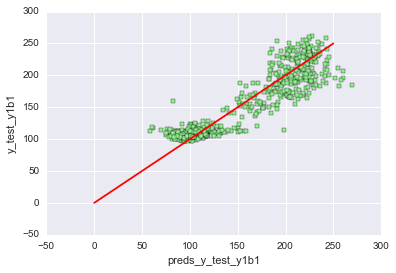

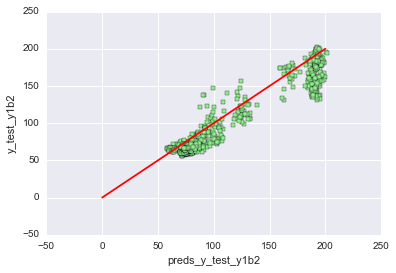

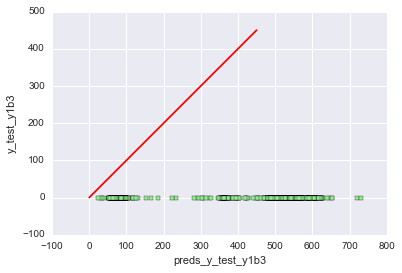

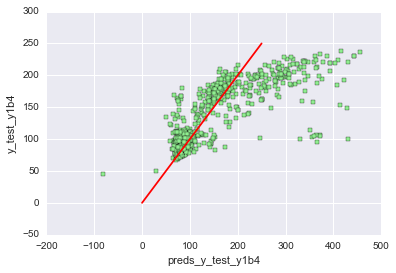

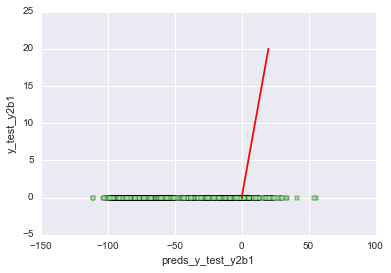

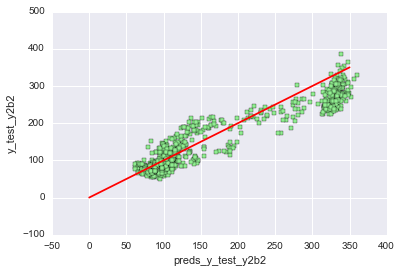

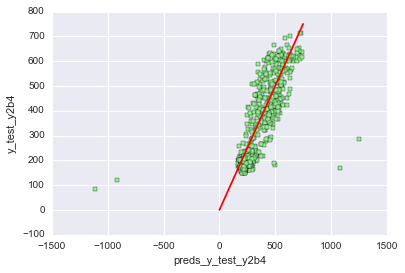

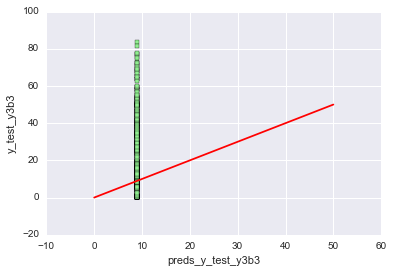

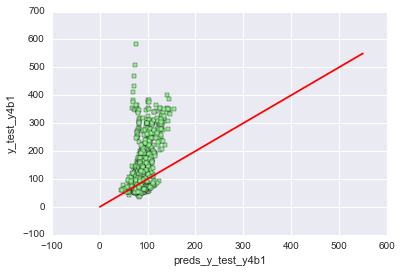

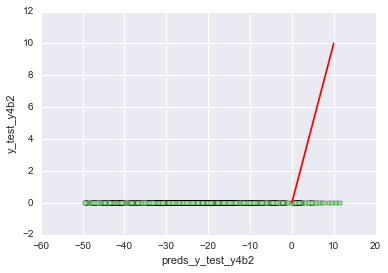

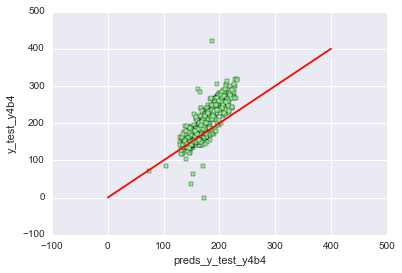

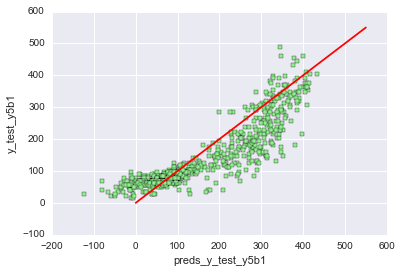

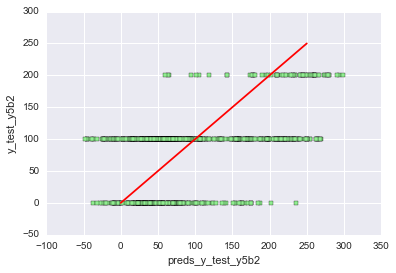

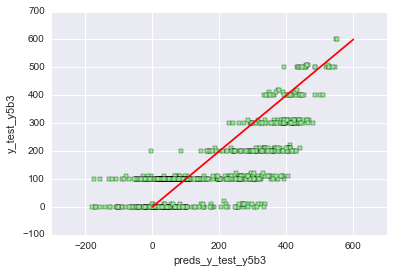

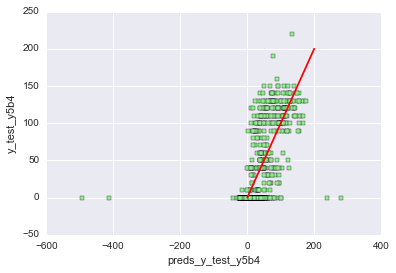

()

In [7]:
# Plot predictions
def plotPreds(preds, reals, xlbl, ylbl, dim) :
    plt.scatter(preds, reals, c = "lightgreen", marker = "s", label = "")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.plot([0, dim], [0, dim], c = "red")
    plt.show()
    return()

plotPreds(preds_y_test_y1b1, y_test_y1b1.y1, "preds_y_test_y1b1", "y_test_y1b1", 250)
plotPreds(preds_y_test_y1b2, y_test_y1b2.y1, "preds_y_test_y1b2", "y_test_y1b2", 200)
plotPreds(preds_y_test_y1b3, y_test_y1b3.y1, "preds_y_test_y1b3", "y_test_y1b3", 450)
plotPreds(preds_y_test_y1b4, y_test_y1b4.y1, "preds_y_test_y1b4", "y_test_y1b4", 250)
plotPreds(preds_y_test_y2b1, y_test_y2b1.y2, "preds_y_test_y2b1", "y_test_y2b1", 20)
plotPreds(preds_y_test_y2b2, y_test_y2b2.y2, "preds_y_test_y2b2", "y_test_y2b2", 350)
plotPreds(preds_y_test_y2b4, y_test_y2b4.y2, "preds_y_test_y2b4", "y_test_y2b4", 750)
plotPreds(preds_y_test_y3b3, y_test_y3b3.y3, "preds_y_test_y3b3", "y_test_y3b3", 50)
plotPreds(preds_y_test_y4b1, y_test_y4b1.y4, "preds_y_test_y4b1", "y_test_y4b1", 550)
plotPreds(preds_y_test_y4b2, y_test_y4b2.y4, "preds_y_test_y4b2", "y_test_y4b2", 10)
plotPreds(preds_y_test_y4b4, y_test_y4b4.y4, "preds_y_test_y4b4", "y_test_y4b4", 400)
plotPreds(preds_y_test_y5b1, y_test_y5b1.y5, "preds_y_test_y5b1", "y_test_y5b1", 550)
plotPreds(preds_y_test_y5b2, y_test_y5b2.y5, "preds_y_test_y5b2", "y_test_y5b2", 250)
plotPreds(preds_y_test_y5b3, y_test_y5b3.y5, "preds_y_test_y5b3", "y_test_y5b3", 600)
plotPreds(preds_y_test_y5b4, y_test_y5b4.y5, "preds_y_test_y5b4", "y_test_y5b4", 200)


In [8]:
# Correct predictions for special outputs
preds_y_test_y2b3 = np.zeros(preds_y_test_y1b3.shape[0])
preds_y_test_y3b1 = np.zeros(preds_y_test_y1b1.shape[0])
preds_y_test_y3b2 = np.zeros(preds_y_test_y1b2.shape[0])
preds_y_test_y3b4 = np.zeros(preds_y_test_y1b4.shape[0])
preds_y_test_y4b3 = np.zeros(preds_y_test_y1b3.shape[0])

# Concat preds in right format
preds_y_test1 = np.hstack((preds_y_test_y1b1, preds_y_test_y1b2, preds_y_test_y1b3, preds_y_test_y1b4))
preds_y_test2 = np.hstack((preds_y_test_y2b1, preds_y_test_y2b2, preds_y_test_y2b3, preds_y_test_y2b4))
preds_y_test3 = np.hstack((preds_y_test_y3b1, preds_y_test_y3b2, preds_y_test_y3b3, preds_y_test_y3b4))
preds_y_test4 = np.hstack((preds_y_test_y4b1, preds_y_test_y4b2, preds_y_test_y4b3, preds_y_test_y4b4))
preds_y_test5 = np.hstack((preds_y_test_y5b1, preds_y_test_y5b2, preds_y_test_y5b3, preds_y_test_y5b4))

# Correct predictions for near-zero outputs
preds_y_test1[preds_y_test1 < 2] = 0
preds_y_test2[preds_y_test2 < 2] = 0
preds_y_test3[preds_y_test3 < 2] = 0
preds_y_test4[preds_y_test4 < 2] = 0
preds_y_test5[preds_y_test5 < 2] = 0

In [9]:
# Save held-out fold predictions
y_test_name_y1 = "y_test_preds/Lasso_y1_" + DATA + ".csv"
y_test_name_y2 = "y_test_preds/Lasso_y2_" + DATA + ".csv"
y_test_name_y3 = "y_test_preds/Lasso_y3_" + DATA + ".csv"
y_test_name_y4 = "y_test_preds/Lasso_y4_" + DATA + ".csv"
y_test_name_y5 = "y_test_preds/Lasso_y5_" + DATA + ".csv"

pd.DataFrame({"y1": preds_y_test1}).to_csv(y_test_name_y1, index = None, sep = ";")
pd.DataFrame({"y2": preds_y_test2}).to_csv(y_test_name_y2, index = None, sep = ";")
pd.DataFrame({"y3": preds_y_test3}).to_csv(y_test_name_y3, index = None, sep = ";")
pd.DataFrame({"y4": preds_y_test4}).to_csv(y_test_name_y4, index = None, sep = ";")
pd.DataFrame({"y5": preds_y_test5}).to_csv(y_test_name_y5, index = None, sep = ";")

In [10]:
# Now generate predictions on whole test set, to be used in ensemble for submissions
print("DATA : " + DATA)

print("y1 : ")  
la = run_lasso(train_y1b1, y_y1b1.y1)
preds_test_y1b1 = la.predict(test_y1b1.drop(["Id"], axis = 1)) 

la = run_lasso(train_y1b2, y_y1b2.y1)
preds_test_y1b2 = la.predict(test_y1b2.drop(["Id"], axis = 1)) 

la = run_lasso(train_y1b1, y_y1b1.y1)
preds_test_y1b3 = la.predict(test_y1b3.drop(["Id"], axis = 1)) 

la = run_lasso(train_y1b1, y_y1b1.y1)
preds_test_y1b4 = la.predict(test_y1b4.drop(["Id"], axis = 1)) 
print("-----")

print("y2 : ")    
la = run_lasso(train_y2b1, y_y2b1.y2)
preds_test_y2b1 = la.predict(test_y2b1.drop(["Id"], axis = 1)) 

la = run_lasso(train_y2b2, y_y2b2.y2)
preds_test_y2b2 = la.predict(test_y2b2.drop(["Id"], axis = 1)) 

la = run_lasso(train_y2b4, y_y2b4.y2)
preds_test_y2b4 = la.predict(test_y2b4.drop(["Id"], axis = 1)) 
print("-----")
    
print("y3 : ")    
la = run_lasso(train_y3b3, y_y3b3.y3)
preds_test_y3b3 = la.predict(test_y3b3.drop(["Id"], axis = 1)) 
print("-----")
    
print("y4 : ")    
la = run_lasso(train_y4b1, y_y4b1.y4)
preds_test_y4b1 = la.predict(test_y4b1.drop(["Id"], axis = 1)) 

la = run_lasso(train_y4b2, y_y4b2.y4)
preds_test_y4b2 = la.predict(test_y4b2.drop(["Id"], axis = 1)) 

la = run_lasso(train_y4b4, y_y4b4.y4)
preds_test_y4b4 = la.predict(test_y4b4.drop(["Id"], axis = 1)) 
print("-----")
    
print("y5 : ")    
la = run_lasso(train_y5b1, y_y5b1.y5)
preds_test_y5b1 = la.predict(test_y5b1.drop(["Id"], axis = 1)) 

la = run_lasso(train_y5b2, y_y5b2.y5)
preds_test_y5b2 = la.predict(test_y5b2.drop(["Id"], axis = 1)) 

la = run_lasso(train_y5b3, y_y5b3.y5)
preds_test_y5b3 = la.predict(test_y5b3.drop(["Id"], axis = 1)) 

la = run_lasso(train_y5b4, y_y5b4.y5)
preds_test_y5b4 = la.predict(test_y5b4.drop(["Id"], axis = 1)) 
print("-----")


DATA : Lags
y1 : 
LASSO Best alpha : 0.0225
LASSO iter : 656
LASSO Best alpha : 0.069
LASSO iter : 59
LASSO Best alpha : 0.0225
LASSO iter : 656
LASSO Best alpha : 0.0225
LASSO iter : 656
-----
y2 : 
LASSO Best alpha : 0.078
LASSO iter : 357
LASSO Best alpha : 0.078
LASSO iter : 68
LASSO Best alpha : 0.0069
LASSO iter : 181
-----
y3 : 
LASSO Best alpha : 0.013
LASSO iter : 51
-----
y4 : 
LASSO Best alpha : 0.0345
LASSO iter : 75
LASSO Best alpha : 0.039
LASSO iter : 1225
LASSO Best alpha : 0.078
LASSO iter : 57
-----
y5 : 
LASSO Best alpha : 0.051
LASSO iter : 378
LASSO Best alpha : 0.078
LASSO iter : 80
LASSO Best alpha : 0.078
LASSO iter : 529
LASSO Best alpha : 0.0039
LASSO iter : 156
-----


In [11]:
# Correct predictions for special outputs
preds_test_y2b3 = np.zeros(preds_test_y1b3.shape[0])
preds_test_y3b1 = np.zeros(preds_test_y1b1.shape[0])
preds_test_y3b2 = np.zeros(preds_test_y1b2.shape[0])
preds_test_y3b4 = np.zeros(preds_test_y1b4.shape[0])
preds_test_y4b3 = np.zeros(preds_test_y1b3.shape[0])

# Concat preds in right format
preds_test1 = np.hstack((preds_test_y1b1, preds_test_y1b2, preds_test_y1b3, preds_test_y1b4))
preds_test2 = np.hstack((preds_test_y2b1, preds_test_y2b2, preds_test_y2b3, preds_test_y2b4))
preds_test3 = np.hstack((preds_test_y3b1, preds_test_y3b2, preds_test_y3b3, preds_test_y3b4))
preds_test4 = np.hstack((preds_test_y4b1, preds_test_y4b2, preds_test_y4b3, preds_test_y4b4))
preds_test5 = np.hstack((preds_test_y5b1, preds_test_y5b2, preds_test_y5b3, preds_test_y5b4))

# Correct predictions for near-zero outputs
preds_test1[preds_test1 < 2] = 0
preds_test2[preds_test2 < 2] = 0
preds_test3[preds_test3 < 2] = 0
preds_test4[preds_test4 < 2] = 0
preds_test5[preds_test5 < 2] = 0

In [12]:
# Save test set predictions
testId = pd.read_csv("clean_data/testId.csv", header = None)
test_name = "test_preds/Lasso_" + DATA + ".csv"
pd.DataFrame({"Id": testId[0], "y1": preds_test1, "y2": preds_test2, "y3": preds_test3, "y4": preds_test4, "y5": preds_test5}, 
             columns = ["Id", "y1", "y2", "y3", "y4", "y5"]).to_csv(test_name, index = None, sep = ";")

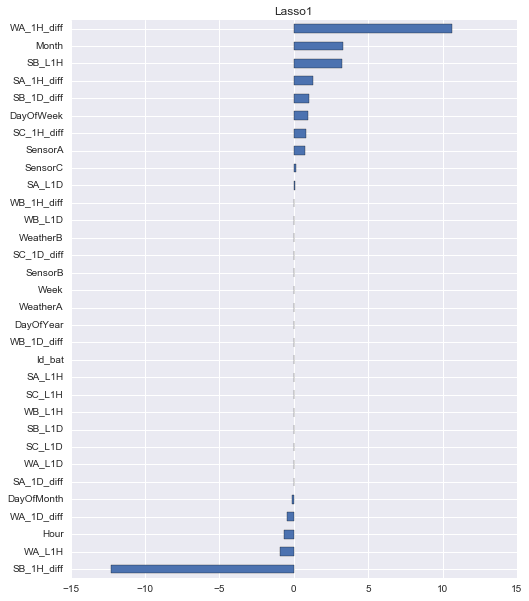

Lasso picked 19 features and eliminated the other 13 features


In [13]:
# Plot important coefficients
coefs = pd.Series(la.coef_, index = train_y5b4.columns)
pd.concat([coefs.sort_values()]).plot(kind = "barh", figsize = (8, 10))
plt.title("Lasso1")
plt.show()
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " + str(sum(coefs == 0)) + " features")